In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [4]:
np_df = pd.read_csv("national_park_species - national_park_species.csv")

Data pre processing: encode categorical variables

In [5]:
for col in ['CategoryName', 'Order', 'Family', 'GRank', 'ParkName', 'Sensitive', 'Nativeness', 'Observations']:
    np_df[f"{col}_cat"] = np_df[col].astype('category').cat.codes

In [6]:
np_df.columns

Index(['ParkCode', 'ParkName', 'CategoryName', 'Order', 'Family',
       'TaxonRecordStatus', 'SciName', 'CommonNames', 'ParkAccepted',
       'Sensitive', 'RecordStatus', 'Occurrence', 'OccurrenceTags',
       'Nativeness', 'NativenessTags', 'Abundance', 'NPSTags', 'ParkTags',
       'References', 'Observations', 'Vouchers', 'ExternalLinks', 'TEStatus',
       'StateStatus', 'OzoneSensitiveStatus', 'GRank', 'SRank',
       'CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'ParkName_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')

In [23]:
# Split data into X and y
X = np_df[['CategoryName_cat', "Order_cat", 'Family_cat', 'GRank_cat', 'Sensitive_cat', 'Nativeness_cat', 'Observations_cat']]
y = np_df['ParkName_cat']

In [24]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [25]:
# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Initialize KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [27]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5551374345549738


In [28]:
def knn():
    
    k_values = [3, 5, 7, 9, 11]
    accuracies = []
    
    # Loop through the different K values and fit a model/obtain accuracy
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
        print(f"K = {k} - Accuracy: {accuracy:.3f}")
        
    # Visulaize the effect of k on accuracy
    
    plt.figure(figsize = (10, 6))
    plt.plot(k_values, accuracies, marker = 'o')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Accuracy')
    plt.title('KNN: Effect of K on Model Accuracy')
    plt.grid(True)
    plt.show()
    

K = 3 - Accuracy: 0.554
K = 5 - Accuracy: 0.555
K = 7 - Accuracy: 0.554
K = 9 - Accuracy: 0.557
K = 11 - Accuracy: 0.556


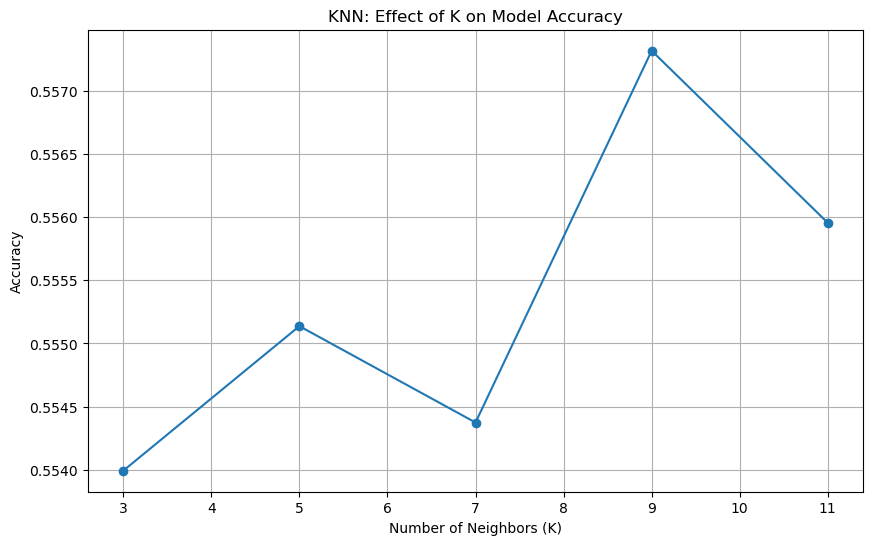

In [29]:
knn()

In [ ]:
# Initialize decision tree classifier

In [30]:
# calculate accuracies

In [32]:
# Tune model
def decision_tree():
    # Different possible max depths
    max_depths = [2, 3, 4, 5]
    accuracies = []
    
    # Loop through different max depths and run a DT model and report accuraces
    for depth in max_depths:
        dt = DecisionTreeClassifier(max_depth = depth)
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Max Depth: {depth} - Accuracy: {accuracy:.3f}")

In [33]:
decision_tree()

Max Depth: 2 - Accuracy: 0.464
Max Depth: 3 - Accuracy: 0.497
Max Depth: 4 - Accuracy: 0.511
Max Depth: 5 - Accuracy: 0.531


In [39]:
# Visualize the best performing tree
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train_scaled, y_train)

# Create the mapping from numeric classes to descriptive names
class_mapping = dict(zip(dt_best.classes_, np_df.ParkName.unique()))

# Convert class labels in dt.classes_ to strings using the mapping
class_names_str = [class_mapping[cls] for cls in dt_best.classes_]

# Plot decision tree
plt.figure(figsize = (12,15), dpi = 700)
plot_tree(dt_best, feature_names = X.columns, class_names = class_names_str,
         filled = True, rounded = True)
plt.title("Decision Tree with max depth of 5")
plt.savefig('decision_tree.png')
plt.show()

In [40]:
# Look more closely at node values
dt_best.tree_.value[2]

array([[ 996.,  901., 1352., 1728., 1806., 1193., 1809., 1144., 1715.,
         994.,  359., 1217., 1802., 1207., 1234.]])

In [42]:
# Feature importance
dt_best.feature_importances_
X.columns

Index(['CategoryName_cat', 'Order_cat', 'Family_cat', 'GRank_cat',
       'Sensitive_cat', 'Nativeness_cat', 'Observations_cat'],
      dtype='object')